In [1]:
# Import base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bnlearn as bn
import os

### Basic casual graph with no priors

In [2]:
# Imprt specific libraries
import bnlearn as bn

In [3]:
# Get data to play with
df = pd.read_csv('DataSets/churn_modelling.csv')

In [4]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [21]:
# Take a subset because creatignna causal netowkr with 14 variables is long
cas_sub_df = df[['CreditScore',
                 'Gender',
                 'Age',
                 'EstimatedSalary',
                 'Exited']]

In [22]:
bn_model = bn.structure_learning.fit(cas_sub_df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


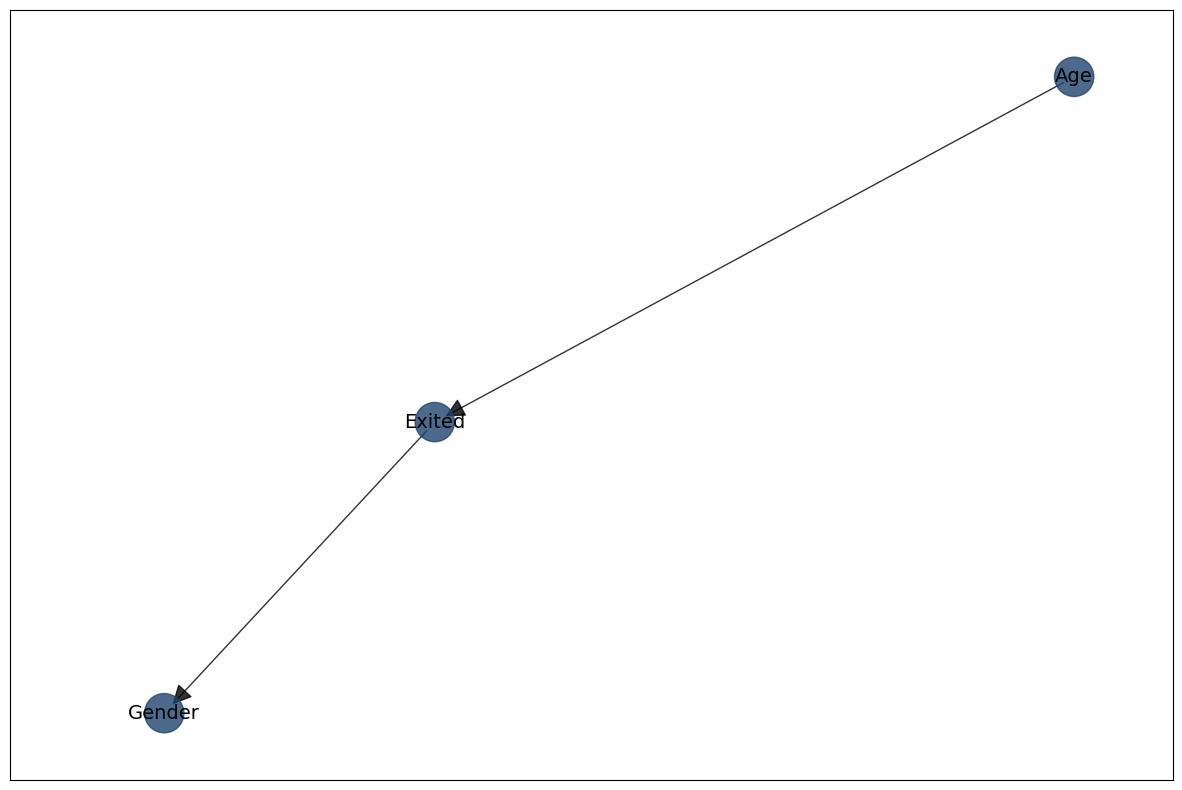

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'CreditScore': array([1.        , 0.60592257]),
  'Gender': array([-0.50688768, -0.32551671]),
  'Age': array([-0.47055257,  0.2787818 ]),
  'EstimatedSalary': array([ 0.47352447, -0.51007912]),
  'Exited': array([-0.49608422, -0.04910854])},
 'G': <networkx.classes.digraph.DiGraph at 0x25bc08a8e50>,
 'node_properties': {'CreditScore': {'node_color': '#1f456e',
   'node_size': 800},
  'Gender': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'EstimatedSalary': {'node_color': '#1f456e', 'node_size': 800},
  'Exited': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Age', 'Exited'): {'color': '#000000', 'weight': 1},
  ('Exited', 'Gender'): {'color': '#000000', 'weight': 1}}}

In [23]:
bn.plot(bn_model,
        interactive=False)

In [25]:
model_it = bn.independence_test(bn_model,
                                cas_sub_df,
                                test="chi_square",
                                alpha=0.05,
                                prune=True)

[bnlearn] >Compute edge strength with [chi_square]


[bnlearn] >Set node properties.
[bnlearn]> Set edge weights based on the [chi_square] test statistic.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


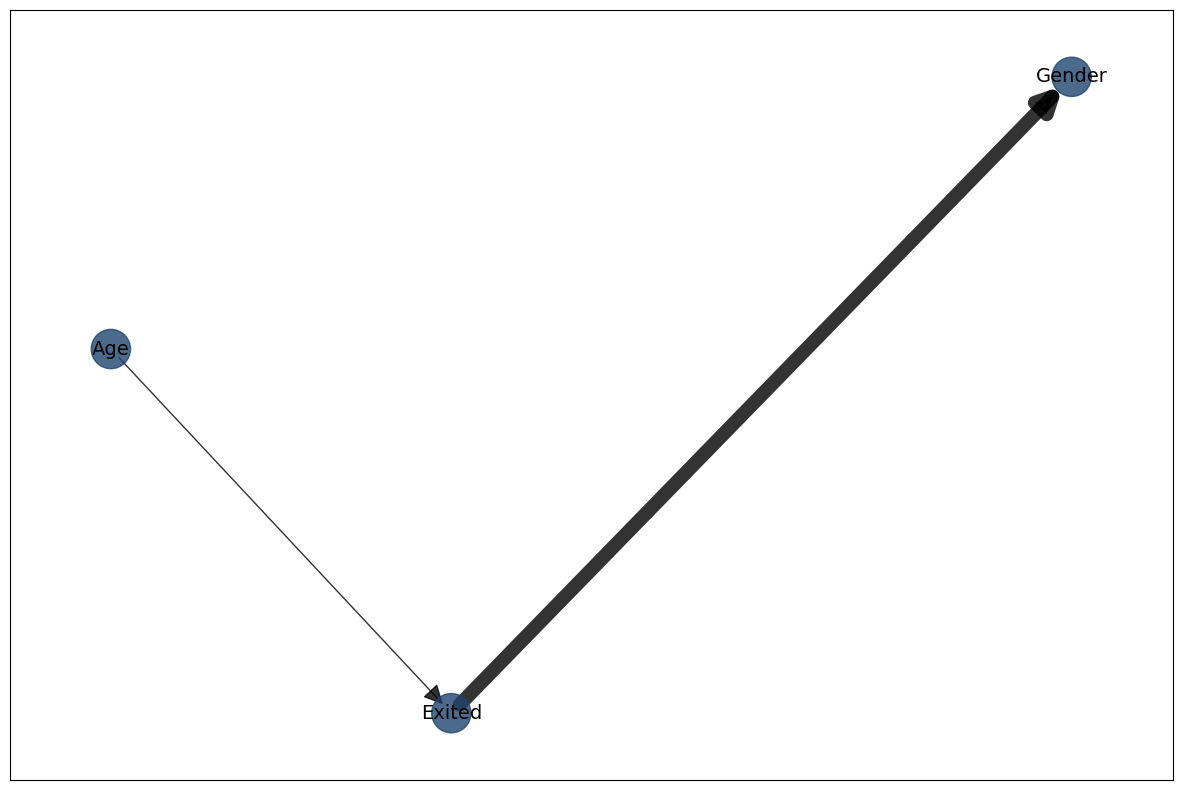

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'CreditScore': array([ 0.09998993, -0.94995795]),
  'Gender': array([0.61326519, 0.59066475]),
  'Age': array([0.04219093, 0.49998176]),
  'EstimatedSalary': array([-1.        , -0.51935443]),
  'Exited': array([0.24455395, 0.37866587])},
 'G': <networkx.classes.digraph.DiGraph at 0x25bc082dc10>,
 'node_properties': {'CreditScore': {'node_color': '#1f456e',
   'node_size': 800},
  'Gender': {'node_color': '#1f456e', 'node_size': 800},
  'Age': {'node_color': '#1f456e', 'node_size': 800},
  'EstimatedSalary': {'node_color': '#1f456e', 'node_size': 800},
  'Exited': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Exited', 'Gender'): {'color': '#000000', 'weight': 1.0},
  ('Age', 'Exited'): {'color': '#000000', 'weight': 10.000000000000002}}}

In [26]:
bn.plot(model_it)

In [27]:
model_par = bn.parameter_learning.fit(model_it, cas_sub_df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Age:
+---------+------------+
| Age(18) | 0.0032987  |
+---------+------------+
| Age(19) | 0.00375325 |
+---------+------------+
| Age(20) | 0.00493506 |
+---------+------------+
| Age(21) | 0.00611688 |
+---------+------------+
| Age(22) | 0.00893506 |
+---------+------------+
| Age(23) | 0.0102987  |
+---------+------------+
| Age(24) | 0.0132987  |
+---------+------------+
| Age(25) | 0.0152987  |
+---------+------------+
| Age(26) | 0.0194805  |
+---------+------------+
| Age(27) | 0.0202987  |
+---------+------------+
| Age(28) | 0.0261169  |
+---------+------------+
| Age(29) | 0.0329351  |
+---------+------------+
| Age(30) | 0.031026   |
+---------+------------+
| Age(31) | 0.038026   |
+---------+------------+
| Age(32) | 0.0392987  |
+---------+------------+
| Age(33

In [28]:
bn.print_CPD(model_par)

[bnlearn] >Data is stored in [query.df]
+----+-------+------------+
|    |   Age |          p |
+====+=======+============+
|  0 |    18 | 0.0032987  |
+----+-------+------------+
|  1 |    19 | 0.00375325 |
+----+-------+------------+
|  2 |    20 | 0.00493506 |
+----+-------+------------+
|  3 |    21 | 0.00611688 |
+----+-------+------------+
|  4 |    22 | 0.00893506 |
+----+-------+------------+
|  5 |    23 | 0.0102987  |
+----+-------+------------+
|  6 |    24 | 0.0132987  |
+----+-------+------------+
|  7 |    25 | 0.0152987  |
+----+-------+------------+
|  8 |    26 | 0.0194805  |
+----+-------+------------+
|  9 |    27 | 0.0202987  |
+----+-------+------------+
| 10 |    28 | 0.0261169  |
+----+-------+------------+
| 11 |    29 | 0.0329351  |
+----+-------+------------+
| 12 |    30 | 0.031026   |
+----+-------+------------+
| 13 |    31 | 0.038026   |
+----+-------+------------+
| 14 |    32 | 0.0392987  |
+----+-------+------------+
| 15 |    33 | 0.0414805  |
+----+--

{'Age':     Age         p
 0    18  0.003299
 1    19  0.003753
 2    20  0.004935
 3    21  0.006117
 4    22  0.008935
 ..  ...       ...
 65   83  0.001390
 66   84  0.001481
 67   85  0.001390
 68   88  0.001390
 69   92  0.001481
 
 [70 rows x 2 columns],
 'Exited':      Exited  Age         p
 0         0   18  0.748031
 1         0   19  0.802768
 2         0   20  0.831579
 3         0   21  0.849257
 4         0   22  0.805233
 ..      ...  ...       ...
 135       1   83  0.467290
 136       1   84  0.500000
 137       1   85  0.467290
 138       1   88  0.467290
 139       1   92  0.438596
 
 [140 rows x 3 columns],
 'Gender':    Gender  Exited         p
 0  Female       0  0.431762
 1  Female       1  0.547497
 2    Male       0  0.568238
 3    Male       1  0.452503}

In [33]:
# Inference
bn.inference.fit(model_par,
                 variables=['Exited'],
                 evidence={'Age': 30})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+----------+-----------+
|    |   Exited |         p |
+====+==========+===========+
|  0 |        0 | 0.908748  |
+----+----------+-----------+
|  1 |        1 | 0.0912516 |
+----+----------+-----------+


<DiscreteFactor representing phi(Exited:2) at 0x25be1021b90>

### Introducing expert priors